In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates,
    MOMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": False,
	"inferring": True,
	"site": "MS", # values: MT, PA, MS, PI
	"training_date": "earlier", # values: earlier, current
	"mode": "ensemble", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_var", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": False,
	"learning_rate": 1e-4,
    "use_cloud_mask": False,
    "mask_out_non_biome": False
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
		dates = [2019, 2020]

	else:
		dates = [2019, 2020]
		dates = [2020, 2021]

	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	if config['training'] == True and config['training_date'] == 'earlier':
		# dates = [2018, 2019]
		dates = [2017, 2018]

	else:
		# dates = [2019, 2020]
		dates = [2018, 2019]

	datasetClass = PIMultipleDates
	config['mask_out_non_biome'] = True
elif config['site'] == 'MO':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MOMultipleDates

else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 1; repetition_id = 7
			exp = 20; repetition_id = 0
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			# exp = 5; repetition_id = 0		
			exp = 24; repetition_id = 0	

	elif type(dataset) == PIMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 7; repetition_id = 0	
			## exp = 18; repetition_id = 0	
			exp = 27; repetition_id = 0
			exp = 28; repetition_id = 0
	elif type(dataset) == MOMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 7; repetition_id = 0	
			exp = 19; repetition_id = 0	

else:

	exp = 28
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': False, 'inferring': True, 'site': 'PI', 'training_date': 'earlier', 'mode': 'ensemble', 'uncertainty_method': 'pred_entropy', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': False, 'learning_rate': 0.0001, 'use_cloud_mask': False, 'mask_out_non_biome': False, 'inference_times': 10, 'training_times': 10}


ic| dataset.py:465 in __init__()- list(self.date_ids): [0]
ic| dataset.py:486 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 9
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]


In [8]:
'''
import src.Logger as lg
importlib.reload(lg)
logger = Logger()
manager.logger = logger
'''

'\nimport src.Logger as lg\nimportlib.reload(lg)\nlogger = Logger()\nmanager.logger = logger\n'

In [9]:
dates

[2018, 2019]

In [10]:
manager.config

{'training': False,
 'inferring': True,
 'site': 'PI',
 'training_date': 'earlier',
 'mode': 'ensemble',
 'uncertainty_method': 'pred_entropy',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': False,
 'learning_rate': 0.0001,
 'use_cloud_mask': False,
 'mask_out_non_biome': True,
 'inference_times': 10,
 'training_times': 10,
 'dropout_training': False}

In [11]:
exp

28

In [12]:
manager.setExperimentPath()
manager.createLogFolders()

In [13]:
# ic(type(dataset), exp, dataset.dates)


In [14]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/PI/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:563 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([340580606,   4312043,   6953620,   5659916,   7162776,   6261432,
                                                                      8191420,   3233962,   3270293,   3044419,   1817289,   2359424,
                                                                      2201926,   3050229,   2901307,   2418575], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:566 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([340580606,   4312043,   6953620,   5659916,   7162776,   6261432,
                                                                      8191420,   3233962,   3270293,   3044419,   1817289,   2359424,
                                                                      2201926,   3050229,   2901307,   2418575], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:570 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([340580606,   4312043,   6953620,   5659916,   7162776,   6261432,
                                                                      8191420,   3233962,   3270293,   3044419,   1817289,   2359424,
                                                                      2201926,   3050229,   2901307,   2418575], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PI/deforestation_before_2000_PI.tif


ic| dataset.py:574 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([385251297,  18167940], dtype=int64))
ic| dataset.py:576 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([340580606,   4312043,   6953620,   5659916,   7162776,   6261432,
                                                                      8191420,   3233962,   3270293,   3044419,   1817289,   2359424,
                                                                      2201926,   3050229,   2901307,   2418575], dtype=int64))


D:/Jorge/datasets/sentinel2/PI/biome_limits.tif


ic| dataset.py:555 in loadLabel()
    label_per_date.shape: (19357, 20841, 1)


Removing bufer................
Mask label shape:  
 (19357, 20841, 1) 
 Unique values:  
 [0 1 2]


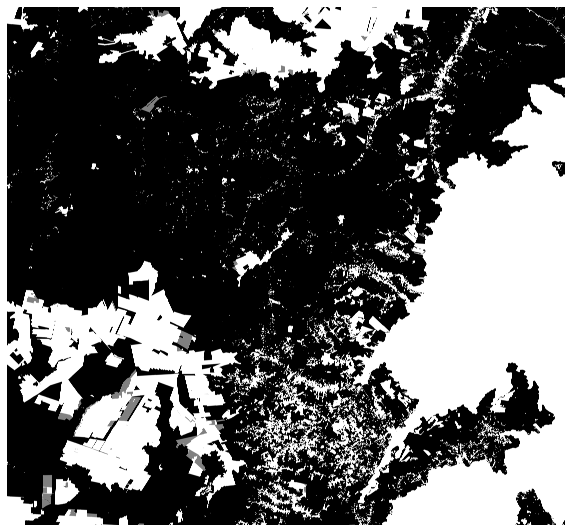

In [15]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [16]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3871 4168
Mask size:  (19355, 20840)


In [17]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [18]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([15036987,     3101,  1094240], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([11272806,   213868,  4647654], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([7929261,  131616, 8073451], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([10473529,    67001,  5593798], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([14272845,     8968,  1852515], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([15882591,     1882,   249855], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([15769894,    32726,   331708], dtype=int64))
Set 8 (array([0, 1, 2], dtype=uint8), array([15501490,    16735,   616103], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([13904042,    87518,  2142768], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([ 4315551,      249, 11818528], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([14157768,   104779,  1871781], dtype=int64))
Set 12 (arr

In [19]:

manager.label_mask.dtype

dtype('uint8')

In [20]:

manager.getLabelCurrentDeforestation()

In [21]:

manager.loadInputImage()

ic| dataset.py:506 in loadInputImage()
    image_stack.shape: (19357, 20841, 9)


Image shape:  (19357, 20841, 9)
mask:  (19355, 20840)
image stack:  (19355, 20840, 9)
ref : (19355, 20840, 1)


In [22]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
        0.2777778 , 0.33333334, 0.3888889 , 0.5       , 0.6111111 ,
        0.7222222 , 0.8333333 , 0.9444445 , 1.        ], dtype=float32),
 array([330731604,   2201856,   2359401,   1817235,   3044355,   3270027,
          3233918,   8191217,   6258301,   7162448,   5659195,   6953190,
          4309946,  18165507], dtype=int64))

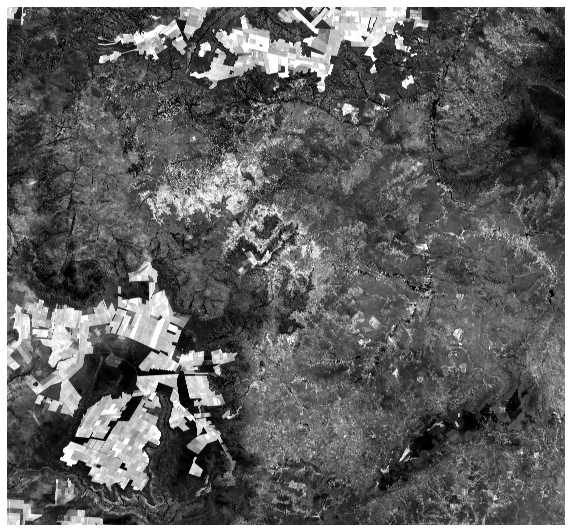

In [23]:

manager.logger.plotFigure(manager.image_stack[...,1], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

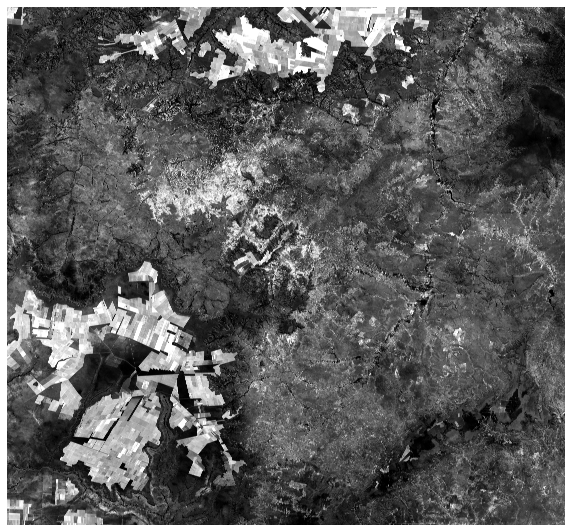

In [24]:

manager.logger.plotFigure(manager.image_stack[...,5], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [25]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([256247610,   2816544, 144294046], dtype=int64))

In [26]:
# manager.maskNoDataAsNotConsideredClass()

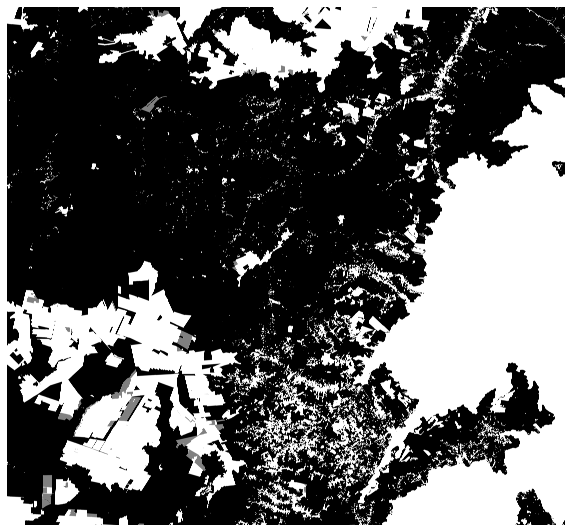

In [27]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [28]:

manager.getImageChannels()

ic| base.py:111 in getImageChannels()
    self.image_stack.shape: (19355, 20840, 9)
ic| base.py:113 in getImageChannels()- self.channels: 9


In [29]:

manager.getTrainValTestMasks()

Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 25]
Validation tiles:  [9, 11, 24]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]


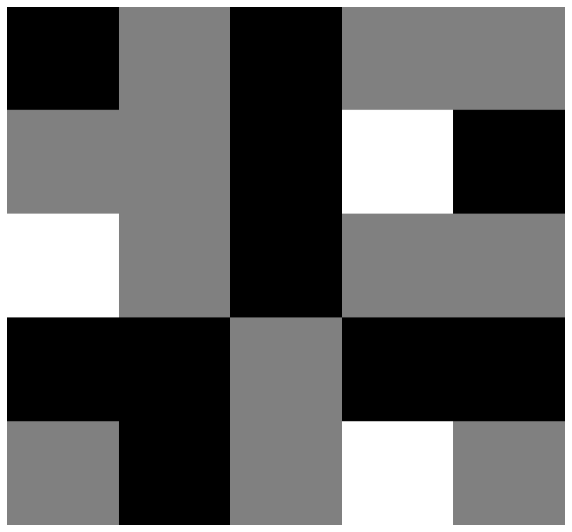

In [30]:
manager.logger.plotFigure(manager.mask_tr_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [31]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [32]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([129670911,    941653,  62999372], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([36829454,   218298, 11355232], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([89747245,  1656593, 69939442], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([256247610,   2816544, 144294046], dtype=int64))


In [33]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 4))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 4))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 4))

train unique percentage [0.6697 0.0049 0.3254]
val unique [0.7609 0.0045 0.2346]
test unique [0.5563 0.0103 0.4335]


In [34]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


In [35]:
if config["training"] == True:
    manager.extractCoords()

In [36]:
if config["training"] == True:
    manager.trainTestSplit()

In [37]:
if config["training"] == True:
    manager.label_mask.shape

In [38]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [39]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [40]:
if config["training"] == True:
    print(manager.coords_train)

In [41]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

In [42]:
if config["training"] == True:
    inputSnipShow = True

In [43]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [44]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [45]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [46]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8]]

In [47]:
manager.dataset.bands

4

In [48]:
manager.dataset.previewBandsSnip

[[1, 2, 3], [5, 6, 7]]

In [49]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


In [50]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


In [51]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

In [52]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [53]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [54]:
if config["training"] == True:
    manager.getGenerators()


In [55]:
if config["training"] == True:
    manager.fixChannelNumber()

In [56]:
if config["training"] == True:
    print(manager.path_exp)

In [57]:
if config["training"] == True:
    print(manager.channels)

In [58]:
if config["training"] == True:
    print(manager.image_stack.shape)

In [59]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

In [60]:
manager.class_n

3

In [61]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

In [62]:
if config["training"] == True:
    manager.plotHistory()


In [63]:
repetition_id = 0

In [64]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [65]:
manager.image_stack.shape

(19355, 20840, 9)

In [66]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [67]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [68]:
manager.image_stack.shape

(19355, 20840, 9)

In [69]:
manager.setPadding()

-5.0 -24.0


In [70]:
import src.network as network
from tensorflow.keras.models import Model, load_model, Sequential
'''
def infer(self):

    self.h, self.w, self.c = self.image1_pad.shape
    self.c = self.channels
    patch_size_rows = self.h//self.n_rows
    patch_size_cols = self.w//self.n_cols
    num_patches_x = int(self.h/patch_size_rows)
    num_patches_y = int(self.w/patch_size_cols)

    ic(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5')
    model = load_model(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5', compile=False)
    
    if self.classes_mode == False:
        class_n = 3
        self.patchesHandler.class_n = class_n
    else:
        class_n = 2    
        self.patchesHandler.class_n = class_n + 1
    if self.config["loadInference"] == False:
        if self.config["save_probabilities"] == False:
            if self.classes_mode == False:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)
            else:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)

            # self.prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)
        print("Dropout training mode: {}".format(self.config['dropout_training']))
        new_model = network.build_resunet_dropout_spatial(input_shape=(patch_size_rows,patch_size_cols, self.c), 
            nb_filters = self.nb_filters, n_classes = class_n, dropout_seed = None, training=self.config['dropout_training'])

        for l in range(1, len(model.layers)):
            new_model.layers[l].set_weights(model.layers[l].get_weights())
        
        

        metrics_all =[]
        with tf.device('/cpu:0'):
            for tm in range(0,self.config["inference_times"]):

                print('time: ', tm)

                
                # Recinstructing predicted map
                start_test = time.time()
                
                prob_reconstructed = self.patchesHandler.infer(
                        new_model, self.image1_pad, self.h, self.w, 
                        num_patches_x, num_patches_y, patch_size_rows, 
                        patch_size_cols, classes_mode = self.classes_mode)
                        
                ts_time =  time.time() - start_test

                if self.config["save_probabilities"] == True:
                    np.save(self.path_maps+'/'+'prob_'+str(tm)+'.npy',prob_reconstructed) 
                else:
                    self.prob_rec[...,tm] = prob_reconstructed
                
                metrics_all.append(ts_time)
                del prob_reconstructed
            metrics_ = np.asarray(metrics_all)
            # Saving test time
            np.save(self.path_exp+'/metrics_ts.npy', metrics_)
    del self.image1_pad
'''

'\ndef infer(self):\n\n    self.h, self.w, self.c = self.image1_pad.shape\n    self.c = self.channels\n    patch_size_rows = self.h//self.n_rows\n    patch_size_cols = self.w//self.n_cols\n    num_patches_x = int(self.h/patch_size_rows)\n    num_patches_y = int(self.w/patch_size_cols)\n\n    ic(self.path_models+ \'/\' + self.method +\'_\'+str(self.repetition_id)+\'.h5\')\n    model = load_model(self.path_models+ \'/\' + self.method +\'_\'+str(self.repetition_id)+\'.h5\', compile=False)\n    \n    if self.classes_mode == False:\n        class_n = 3\n        self.patchesHandler.class_n = class_n\n    else:\n        class_n = 2    \n        self.patchesHandler.class_n = class_n + 1\n    if self.config["loadInference"] == False:\n        if self.config["save_probabilities"] == False:\n            if self.classes_mode == False:\n                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)\n            else:

In [71]:
'''
import types

manager.infer = types.MethodType(infer, manager)
'''


'\nimport types\n\nmanager.infer = types.MethodType(infer, manager)\n'

In [72]:
manager.infer()

time:  0
Loading model in: D:/Jorge/datasets/deforestation/experiments/PI/exp28/models/resunet_0.h5
time:  1
Loading model in: D:/Jorge/datasets/deforestation/experiments/PI/exp28/models/resunet_1.h5
time:  2
Loading model in: D:/Jorge/datasets/deforestation/experiments/PI/exp28/models/resunet_2.h5
time:  3
Loading model in: D:/Jorge/datasets/deforestation/experiments/PI/exp28/models/resunet_3.h5
time:  4
Loading model in: D:/Jorge/datasets/deforestation/experiments/PI/exp28/models/resunet_4.h5
time:  5
Loading model in: D:/Jorge/datasets/deforestation/experiments/PI/exp28/models/resunet_5.h5
time:  6
Loading model in: D:/Jorge/datasets/deforestation/experiments/PI/exp28/models/resunet_6.h5
time:  7
Loading model in: D:/Jorge/datasets/deforestation/experiments/PI/exp28/models/resunet_7.h5
time:  8
Loading model in: D:/Jorge/datasets/deforestation/experiments/PI/exp28/models/resunet_8.h5
time:  9
Loading model in: D:/Jorge/datasets/deforestation/experiments/PI/exp28/models/resunet_9.h5


In [73]:
manager.loadPredictedProbabilities()

In [74]:
manager.prob_rec.shape

(19360, 20864, 10)

In [75]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [76]:
manager.prob_rec.shape

(19360, 20864, 10)

In [77]:
manager.getMeanProb()

In [78]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:121 in getStats()
    np.min(value): 3.3755788e-07
    np.mean(value): 0.06880798
    np.max(value): 0.98154193


In [79]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (19360, 20864)


(19360, 20864)

In [80]:
manager.unpadMeanProb()

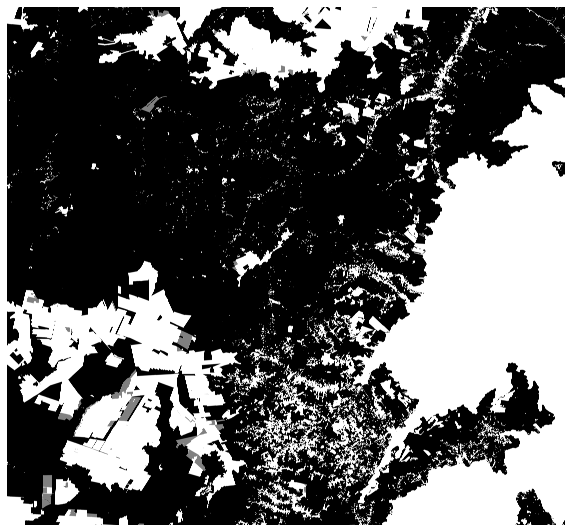

In [81]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [82]:
manager.squeezeLabel()

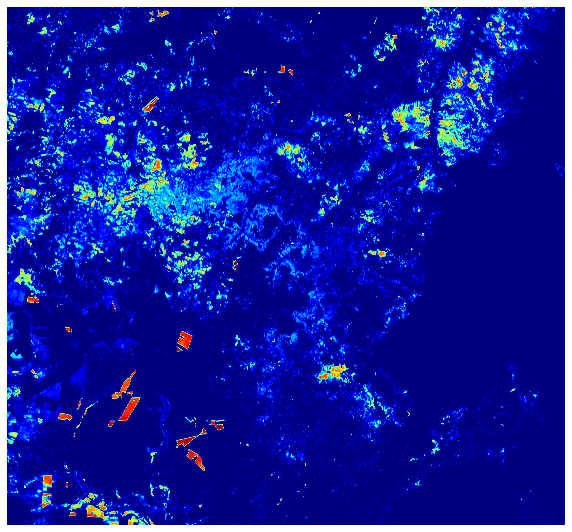

In [83]:
manager.setMeanProbNotConsideredAreas()
manager.logger.plotFigure(manager.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [84]:
print(manager.label_mask.shape)

(19355, 20840)


In [85]:
# manager.getLabelTest()

In [86]:
# manager.getMAP()

In [87]:
manager.prob_rec.shape

(19360, 20864, 10)

In [88]:
manager.preprocessProbRec()
print(manager.prob_rec.shape)

(10, 19360, 20864, 1)


In [89]:
manager.prob_rec.shape

(10, 19360, 20864, 1)

In [90]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:121 in getStats()
    np.min(value): 5.9371995e-12
    np.mean(value): 0.0688066
    np.max(value): 1.0


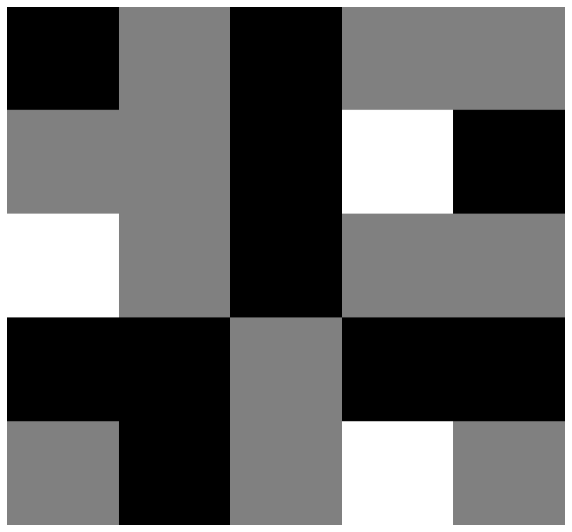

In [91]:
manager.logger.plotFigure(manager.mask_tr_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [92]:
manager.getLabelCurrentDeforestation()

In [93]:
manager.applyProbabilityThreshold()

(19355, 20840)
(array([0., 1.], dtype=float32), array([393661832,   9696368], dtype=int64))


ic| base.py:413 in applyProbabilityThreshold()
    self.predicted_unpad.shape: (19355, 20840)
    self.predicted.shape: (19355, 20840)


In [94]:
manager.getTestValues()

ic| base.py:436 in getTestValues()- predicted_test.shape: (161343280,)
ic| base.py:445 in getTestValues()- predicted_test.shape: (91403838,)


In [95]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([393661832,   9696368], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([394079947,   9278253], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([402940085,    418115], dtype=int64))


In [96]:
manager.calculateMetrics()

ic| base.py:489 in calculateMetrics()
    self.f1: 71.17
    self.precision: 57.31
    self.recall: 93.86


In [97]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| base.py:418 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (48402984,)
ic| base.py:424 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (36985792,)
ic| base.py:500 in calculateMetricsValidation()
    f1_val: 23.4
    precision_val: 13.5
    recall_val: 87.69
    mAP_val: 67.69


In [98]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [99]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/PI/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:563 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([340580606,   4312043,   6953620,   5659916,   7162776,   6261432,
                                                                      8191420,   3233962,   3270293,   3044419,   1817289,   2359424,
                                                                      2201926,   3050229,   2901307,   2418575], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:566 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([340580606,   4312043,   6953620,   5659916,   7162776,   6261432,
                                                                      8191420,   3233962,   3270293,   3044419,   1817289,   2359424,
                                                                      2201926,   3050229,   2901307,   2418575], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:570 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([340580606,   4312043,   6953620,   5659916,   7162776,   6261432,
                                                                      8191420,   3233962,   3270293,   3044419,   1817289,   2359424,
                                                                      2201926,   3050229,   2901307,   2418575], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PI/deforestation_before_2000_PI.tif


ic| dataset.py:574 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([385251297,  18167940], dtype=int64))
ic| dataset.py:576 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([340580606,   4312043,   6953620,   5659916,   7162776,   6261432,
                                                                      8191420,   3233962,   3270293,   3044419,   1817289,   2359424,
                                                                      2201926,   3050229,   2901307,   2418575], dtype=int64))


D:/Jorge/datasets/sentinel2/PI/biome_limits.tif


ic| dataset.py:555 in loadLabel()
    label_per_date.shape: (19357, 20841, 1)


In [100]:
manager.getErrorMask()

(array([0., 1.], dtype=float32), array([396059891,   7298309], dtype=int64))


In [101]:
manager.getErrorMaskToShowRGB()

[0. 1.]


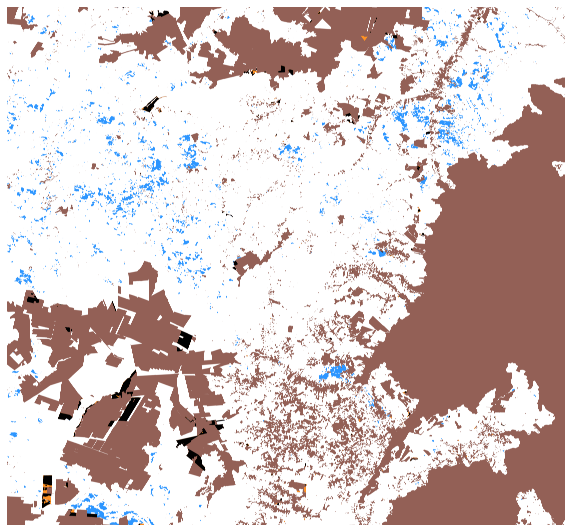

In [102]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [103]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [104]:
# manager.config['uncertainty_method'] = "pred_entropy"

In [105]:
manager.setUncertainty()

K = 1, pred_mean shape (19360, 20864, 1)


In [106]:
# manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [107]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:121 in getStats()
    np.min(value): 5.0301287e-06
    np.mean(value): 0.1005659
    np.max(value): 0.36787948


In [108]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:121 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.07732279
    np.max(value): 0.36787948


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (19355, 20840)


(19355, 20840)

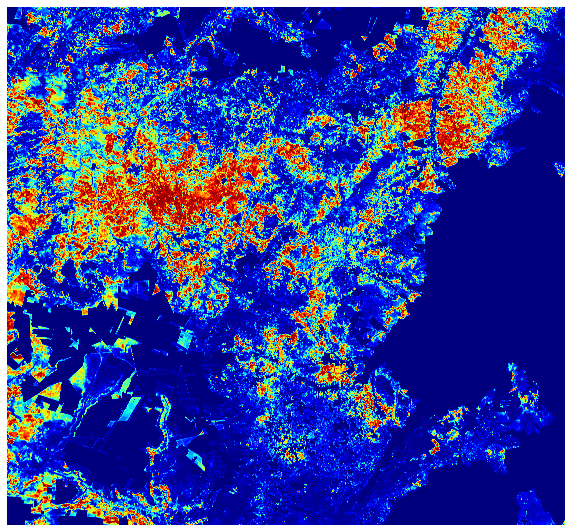

In [109]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



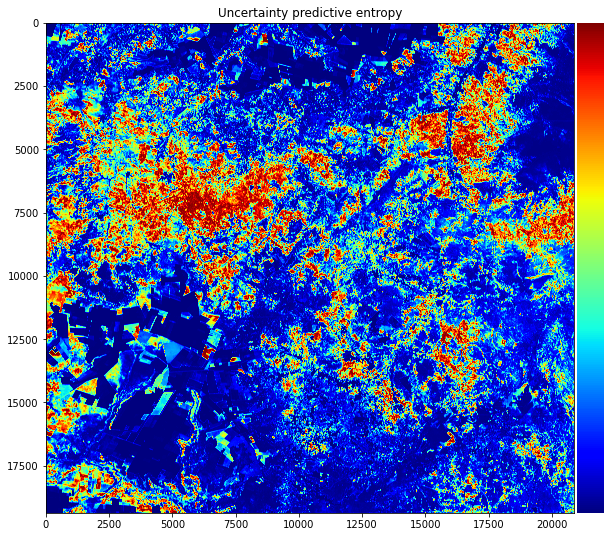

In [110]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

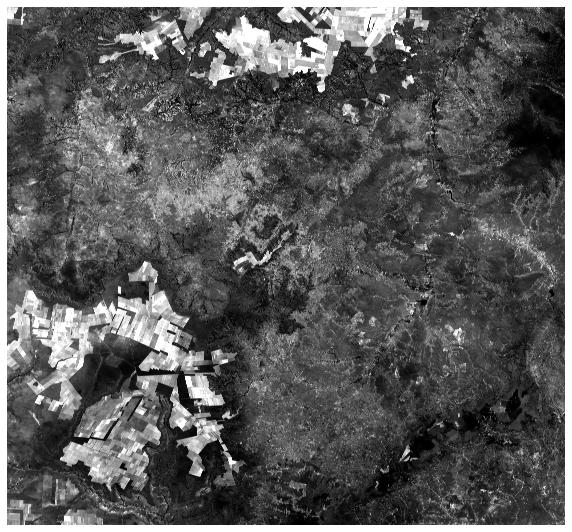

In [111]:

manager.logger.plotFigure(manager.image_stack[...,7], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [112]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:540 in getTestValues2()
    self.label_mask.shape: (19355, 20840)
ic| base.py:541 in getTestValues2()
    self.mask_amazon_ts.shape: (19355, 20840)
ic| base.py:545 in getTestValues2()
    self.label_mask_test.shape: (161343280,)
ic| base.py:553 in getTestValues2()
    self.error_mask_test.shape: (91290535,)


In [113]:
manager.dataset.previewLims1 = np.array([ 5500,  8500, 10000, 12500])

ic| Logger.py:165 in plotCropSample()
    manager.dataset.previewLims1: array([ 5500,  8500, 10000, 12500])
    manager.dataset.previewLims2: array([16000, 18000,  3000,  6000])
ic| Logger.py:167 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| Logger.py:169 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([0, 1], dtype=uint8), array([2336000, 3664000], dtype=int64))


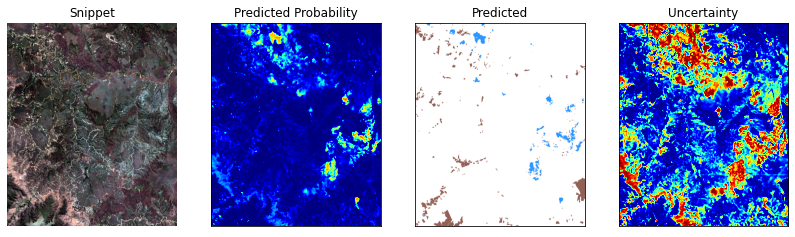

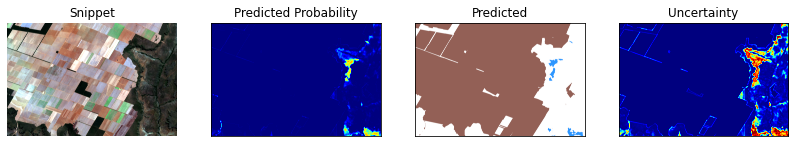

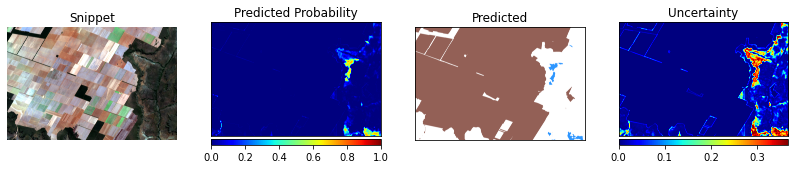

In [114]:
manager.logger.plotCropSample(manager)

In [115]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [116]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [117]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

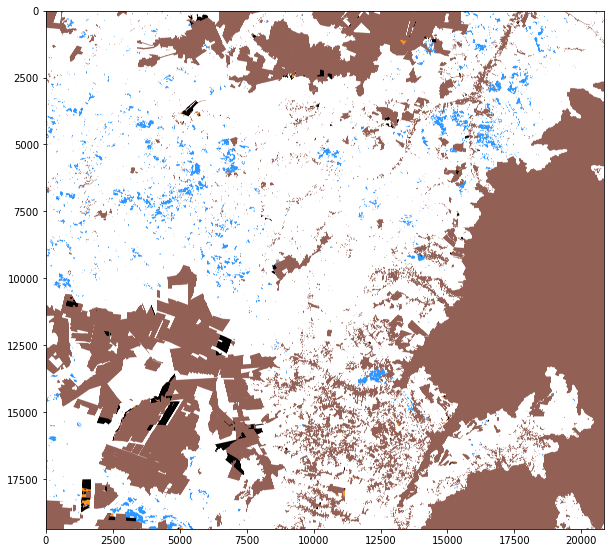

In [118]:
plt.figure(figsize=(10, 10))
plt.imshow(manager.error_mask_to_show_rgb[...,::-1])


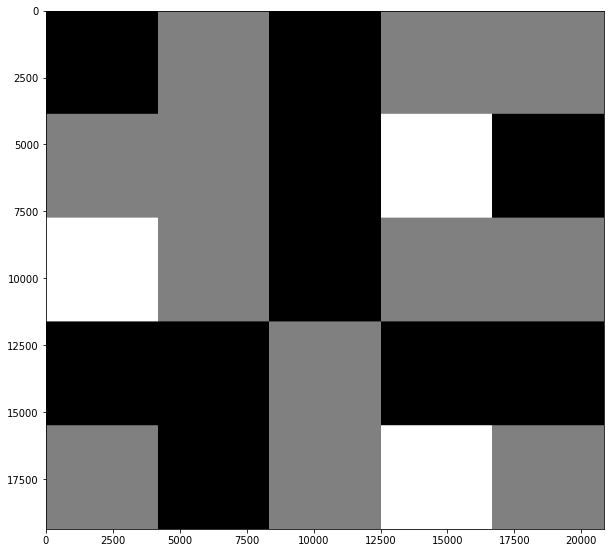

In [119]:
plt.figure(figsize=(10, 10))
plt.imshow(manager.mask_tr_val, cmap='gray')

In [120]:
manager.dataset.previewLims1 = np.array([230, 500, 2230, 2500])
manager.dataset.previewLims2 = np.array([12500, 15000, 15000, 17500])
manager.dataset.previewLims2 = np.array([4000, 5000, 18000, None])
manager.dataset.previewLims2 = np.array([3000, 7000, 16000, None])


# PI
manager.dataset.previewLims2 = np.array([5000, 7500, 12500, 15000])
manager.dataset.previewLims1 = np.array([17000, 18000, 5000, 7500])
manager.dataset.previewLims2 = np.array([5000, 7500, 10000, 12500])

# MA

manager.dataset.previewLims1 = np.array([17000, 18000, 6000, 7000])
manager.dataset.previewLims2 = np.array([12500, 15000, 2000, 3000])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


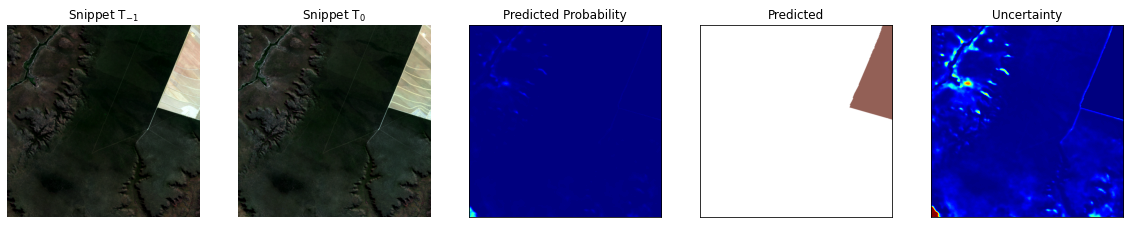

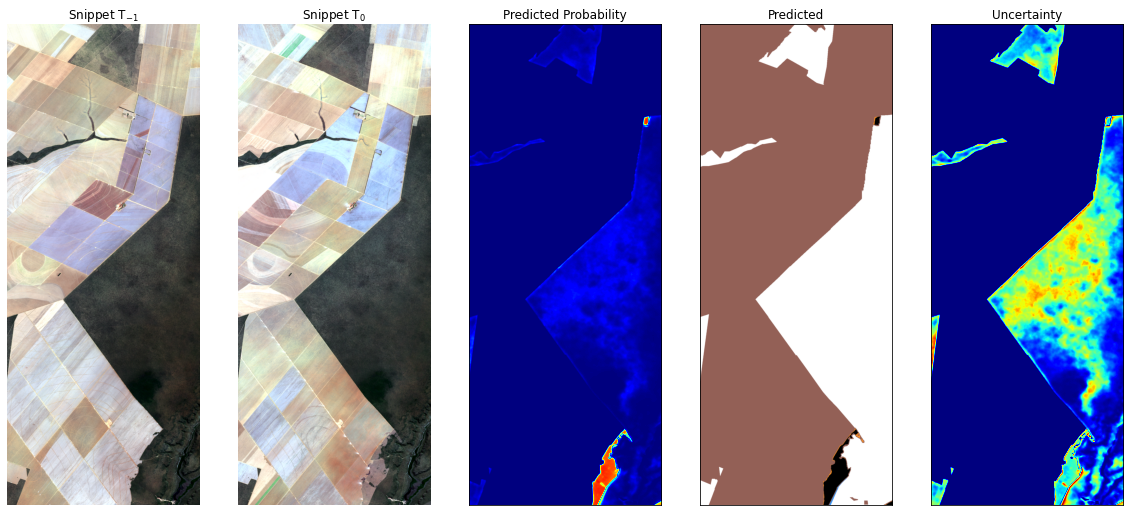

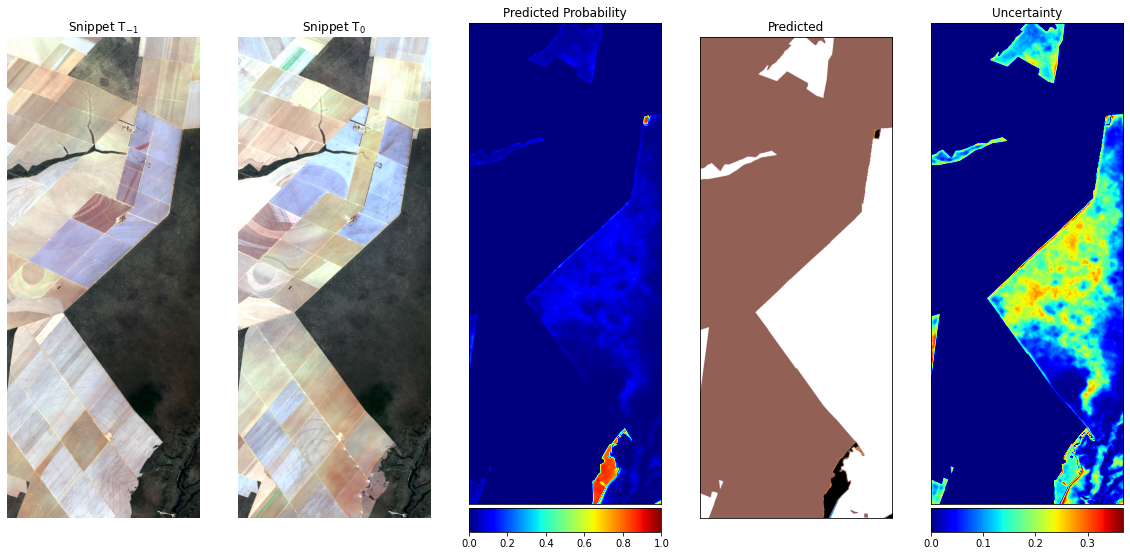

In [121]:
manager.logger.plotCropSampleT0T1(manager, manager.dataset.previewLims1, save_name='1')
manager.logger.plotCropSampleT0T1(manager, manager.dataset.previewLims2, save_name='2')
manager.logger.plotCropSampleT0T1(manager, manager.dataset.previewLims2, colorbar=True, save_name='Colorbar')

In [122]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:121 in getStats()
    np.min(value): 0.00010363107
    np.mean(value): 0.10503261
    np.max(value): 0.36787948


In [123]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [124]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [125]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [126]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [127]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
            self.threshold_list = np.linspace(np.min(self.uncertainty) + 0.000015, np.max(self.uncertainty) - 0.0015, 19)
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [128]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)



Get precision-recall threshold

In [129]:

manager.getUncertaintyAAValues()

ic| 1409948429.py:63 in getUncertaintyAAValues()
    self.uncertainty.shape: (91290535,)
    self.label_mask_current_deforestation_test.shape: (91290535,)


[0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]
threshold 0.0025


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:682 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (92155500,)
    self.label_mask_current_deforestation_test.shape: (92155500,)


threshold 0.0025
(92155500,) (92155500,)
cm_audited [[91447899        0]
 [      12   707589]]
[1.         0.99998304]
threshold 0.005
(92155500,) (92155500,)
cm_audited [[91447899        0]
 [    1315   706286]]
[1.         0.99814161]
threshold 0.0075
(92155500,) (92155500,)
cm_audited [[91447899        0]
 [    3974   703627]]
[1.         0.99438384]
threshold 0.01
(92155500,) (92155500,)
cm_audited [[91447899        0]
 [    4706   702895]]
[1.         0.99334936]
threshold 0.015
(92155500,) (92155500,)
cm_audited [[91447899        0]
 [    6402   701199]]
[1.         0.99095253]
threshold 0.025
(92155500,) (92155500,)
cm_audited [[91447899        0]
 [    9798   697803]]
[1.         0.98615321]
threshold 0.05
(92155500,) (92155500,)
cm_audited [[91447899        0]
 [   19579   688022]]
[1.         0.97233045]
threshold 0.08
(92155500,) (92155500,)
cm_audited [[91447884       15]
 [   32065   675536]]
[0.9999778  0.95468491]
threshold 0.1
(92155500,) (92155500,)
cm_audited [[914477

ic| base.py:688 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[1.        , 0.99998304],
                                  [1.        , 0.99814161],
                                  [1.        , 0.99438384],
                                  [1.        , 0.99334936],
                                  [1.        , 0.99095253],
                                  [1.        , 0.98615321],
                                  [1.        , 0.97233045],
                                  [0.9999778 , 0.95468491],
                                  [0.99970216, 0.94396136],
                                  [0.99089454, 0.91845263],
                                  [0.9320447 , 0.89391338],
                                  [0.86522194, 0.88246766],
                                  [0.77525672, 0.87052025],
                                  [0.68404195, 0.86077606],
                                  [0.545937  , 0.84568422],
                                  [0.37919328, 0.

cm_audited [[90386101  1061798]
 [  192527   515074]]
[0.32664287 0.72791587]


In [ ]:
manager.setPlotLimsForUncertaintyAA()

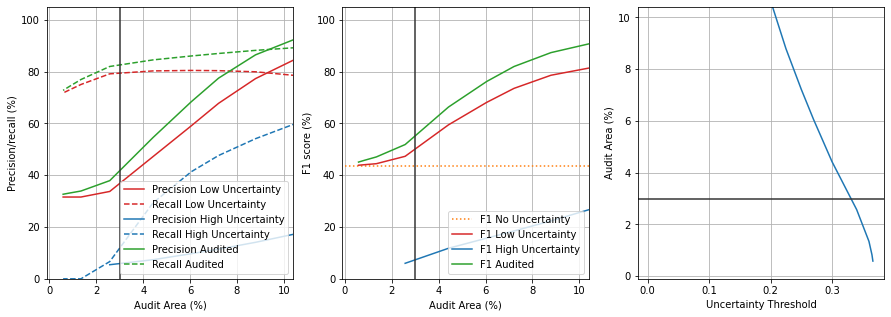

In [ ]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [130]:
from scipy import optimize  


In [131]:
manager.getOptimalUncertaintyThreshold(bounds=(np.min(manager.uncertainty) + 0.000015, np.max(manager.uncertainty) - 0.0015))

ic| base.py:791 in getOptimalUncertaintyThreshold()
    bounds: (0.00011863107139710337, 0.3663794801235199)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.14001782666091328
threshold 0.14001782666091328


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (27301950,)
    predicted_test_classified_incorrect.shape: (27301950,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 27301950
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 27301950
    len(label_mask_current_deforestation_test): 91290535


[0.99639111 0.98971949 0.50259023 0.2990666  0.38471411 0.88591794
 0.04542   ]
0.22648028453400365
threshold 0.22648028453400365


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (16688811,)
    predicted_test_classified_incorrect.shape: (16688811,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 16688811
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 16688811
    len(label_mask_current_deforestation_test): 91290535


[0.92315394 0.98853433 0.85736317 0.18280987 0.11460664 0.61244061
 0.06647572]
0.27991702225042947
threshold 0.27991702225042947


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (11568546,)
    predicted_test_classified_incorrect.shape: (11568546,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 11568546
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 11568546
    len(label_mask_current_deforestation_test): 91290535


[0.78937169 0.98447893 0.90305258 0.12672229 0.07204613 0.43013982
 0.06940027]
0.3129427424070941
threshold 0.3129427424070941


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (8378194,)
    predicted_test_classified_incorrect.shape: (8378194,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8378194
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 8378194
    len(label_mask_current_deforestation_test): 91290535


[0.68896292 0.98089531 0.92200085 0.09177506 0.05550701 0.27695218
 0.0590906 ]
0.3333537599668553
threshold 0.3333537599668553


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (6101852,)
    predicted_test_classified_incorrect.shape: (6101852,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 6101852
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 6101852
    len(label_mask_current_deforestation_test): 91290535


[0.62097461 0.97765735 0.93203804 0.06683992 0.04815001 0.14125978
 0.03965462]
0.3459684625637587
threshold 0.3459684625637587


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4477030,)
    predicted_test_classified_incorrect.shape: (4477030,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4477030
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4477030
    len(label_mask_current_deforestation_test): 91290535


[0.57521617 0.97476526 0.93833065 0.04904156 0.0455851  0.00799506
 0.01261025]
0.3537647775266165
threshold 0.3537647775266165


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3325141,)
    predicted_test_classified_incorrect.shape: (3325141,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3325141
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3325141
    len(label_mask_current_deforestation_test): 91290535


[0.57309625 0.96758334 0.93862949 0.03642372        nan 0.
 0.01088019]
0.358583165160662
threshold 0.358583165160662


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2544588,)
    predicted_test_classified_incorrect.shape: (2544588,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2544588
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2544588
    len(label_mask_current_deforestation_test): 91290535


[0.57309625 0.96193919 0.93862949 0.02787351        nan 0.
 0.01061922]
0.36391577243224876
threshold 0.36391577243224876


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1542784,)
    predicted_test_classified_incorrect.shape: (1542784,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1542784
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1542784
    len(label_mask_current_deforestation_test): 91290535


[0.57309625 0.95368334 0.93862949 0.01689971        nan 0.
 0.00938544]
0.35770854209559927
threshold 0.35770854209559927


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2692133,)
    predicted_test_classified_incorrect.shape: (2692133,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2692133
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2692133
    len(label_mask_current_deforestation_test): 91290535


[0.57309625 0.96301342 0.93862949 0.02948973        nan 0.
 0.0106818 ]
0.35681585943139466
threshold 0.35681585943139466


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2839464,)
    predicted_test_classified_incorrect.shape: (2839464,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2839464
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2839464
    len(label_mask_current_deforestation_test): 91290535


[0.57309625 0.96413335 0.93862949 0.0311036         nan 0.
 0.01075842]
0.357495956347396
threshold 0.357495956347396


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2727370,)
    predicted_test_classified_incorrect.shape: (2727370,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2727370
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2727370
    len(label_mask_current_deforestation_test): 91290535


[0.57309625 0.96327754 0.93862949 0.02987571        nan 0.
 0.01069915]
0.3573533233595129
threshold 0.3573533233595129


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2751006,)
    predicted_test_classified_incorrect.shape: (2751006,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2751006
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2751006
    len(label_mask_current_deforestation_test): 91290535


[0.57309625 0.96345291 0.93862949 0.03013462        nan 0.
 0.01070981]
0.3574314586105184
threshold 0.3574314586105184


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2738137,)
    predicted_test_classified_incorrect.shape: (2738137,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2738137
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2738137
    len(label_mask_current_deforestation_test): 91290535


[0.57309625 0.9633448  0.93862949 0.02999366        nan 0.
 0.01069864]
0.35739811997561977
threshold 0.35739811997561977


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2743687,)
    predicted_test_classified_incorrect.shape: (2743687,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2743687
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2743687
    len(label_mask_current_deforestation_test): 91290535
ic| base.py:795 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.3574314586105184


[0.57309625 0.96339465 0.93862949 0.03005445        nan 0.
 0.01070484]


In [132]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold:  0.3574314586105184
threshold 0.3574314586105184


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2738137,)
    predicted_test_classified_incorrect.shape: (2738137,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2738137
    len(label_mask_current_deforestation_test): 91290535
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2738137
    len(label_mask_current_deforestation_test): 91290535


[0.57309625 0.9633448  0.93862949 0.02999366        nan 0.
 0.01069864]
threshold 0.3574314586105184
(91290535,) (91290535,)


ic| base.py:826 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.02999366]),
                     'UEO': array([0.01069864]),
                     'f1': 71.17,
                     'f1_H': array([nan]),
                     'f1_L': array([0.71865991]),
                     'precision_H': array([nan]),
                     'precision_L': array([0.57309625]),
                     'recall_H': array([0.]),
                     'recall_L': array([0.9633448]),
                     'recall_Ltotal': array([0.93862949])}
ic| base.py:827 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.72407988]),
                             'precision': array([0.57968037]),
                             'recall': array([0.96428522])}


cm_audited [[88493024  1151134]
 [   58800  1587577]]
[0.57968037 0.96428522]


{'metrics': {'precision_L': array([0.57309625]),
  'recall_L': array([0.9633448]),
  'recall_Ltotal': array([0.93862949]),
  'AA': array([0.02999366]),
  'precision_H': array([nan]),
  'recall_H': array([0.]),
  'UEO': array([0.01069864]),
  'f1_L': array([0.71865991]),
  'f1_H': array([nan]),
  'f1': 71.17},
 'metrics_audited': {'precision': array([0.57968037]),
  'recall': array([0.96428522]),
  'f1': array([0.72407988])},
 'exp': 28}